# Question 6

Write a program to develop histogram of an image and show it through display. The size of the image and pixel values is made flexible. Show and comment about the effect on the histogram of the image if

1. lower-order bit planes, and
2. higher order bit plane are set to zero.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Images to process

In [2]:
path_inp = '../../images/dat/'  # path for input files
path_out_orig = 'originals/'    # path for output files: originals
path_out_conv = 'converted/'    # path for output files: converted

filenames = [
    'a256',
    'ba256',
    'n256',
    'o256',
    'p256',
    'z256'
]

ext_inp = '.dat'    # file extention for input
ext_out = '.bmp'    # file extention for output

#### Convert images to numpy array and store in a list of tuples as (filename, np.array)

In [3]:
# Stores the list of dictionaries for the filename, original image, converted image/s
images = []

# Iterate for all filenames
for idx, filename in enumerate(filenames):
    # Store image pixels as uint8 2D array
    image = np.array(
        [i.strip().split() for i in open(path_inp + filename + ext_inp).readlines()],
        dtype='uint8'
    )

    # Add (filename, numpy array of image) into images list
    images.append({
        'filename': filename,
        'orig': image
    })

    # Save original image as .dat file
    np.savetxt(
        path_out_orig + ext_inp[1:] + '/' + filename + ext_inp,
        image,
        fmt=' %d',
        newline=' \n'
    )

#### Display input images



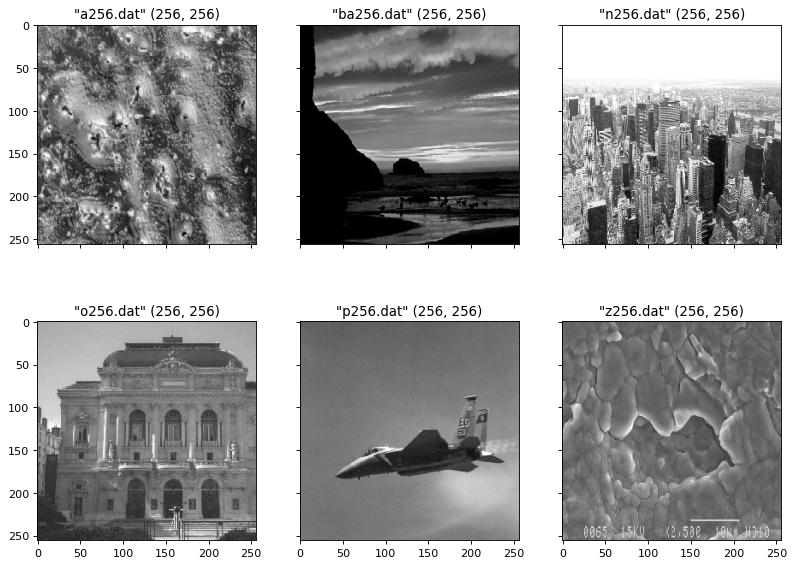

In [4]:
# Matrix dimensions
cols = 3
rows = -(-len(filenames) // cols)

# Create figure with rows × cols subplots
fig, axs = plt.subplots(rows, cols, dpi=80, sharex=True, sharey=True)
fig.set_size_inches(4 * cols, 4.5 * rows)

# Iterate for all images
for idx, image_dict in enumerate(images):
    filename = image_dict['filename']
    image = image_dict['orig']

    # Set subplot title as '"filename" (rows, cols)' 
    axs[int(idx // cols), idx % cols].set_title('"{}" {}'.format(
        filename + ext_inp,
        image.shape
    ))
    # Add subplot to figure plot buffer
    axs[int(idx // cols), idx % cols].imshow(
        image,
        cmap='gray',
        vmin=0,
        vmax=255
    )

    # Save original image as .bmp file
    plt.imsave(
        path_out_orig + ext_out[1:] + '/' + filename + ext_out,
        image,
        cmap='gray',
        vmin=0,
        vmax=255
    )

# Hide x labels and tick labels for top plots and y ticks for right plots
for ax in axs.flat:
    ax.label_outer()

# Display the figure
plt.show()

## Histogram

In [5]:
def gen_histogram(image):
    histogram = np.zeros(256)

    height, width = image.shape
    for i in range(height):
        for j in range(width):
            histogram[image[i][j]] += 1
    
    return histogram

In [6]:
def unset_bit_planes(image, bits):
    new_img = np.copy(image)
    mask = 255
    for i in bits:
        mask ^= 1 << i
    
    height, width = image.shape
    for i in range(height):
        for j in range(width):
            new_img[i][j] &= mask
    
    return new_img

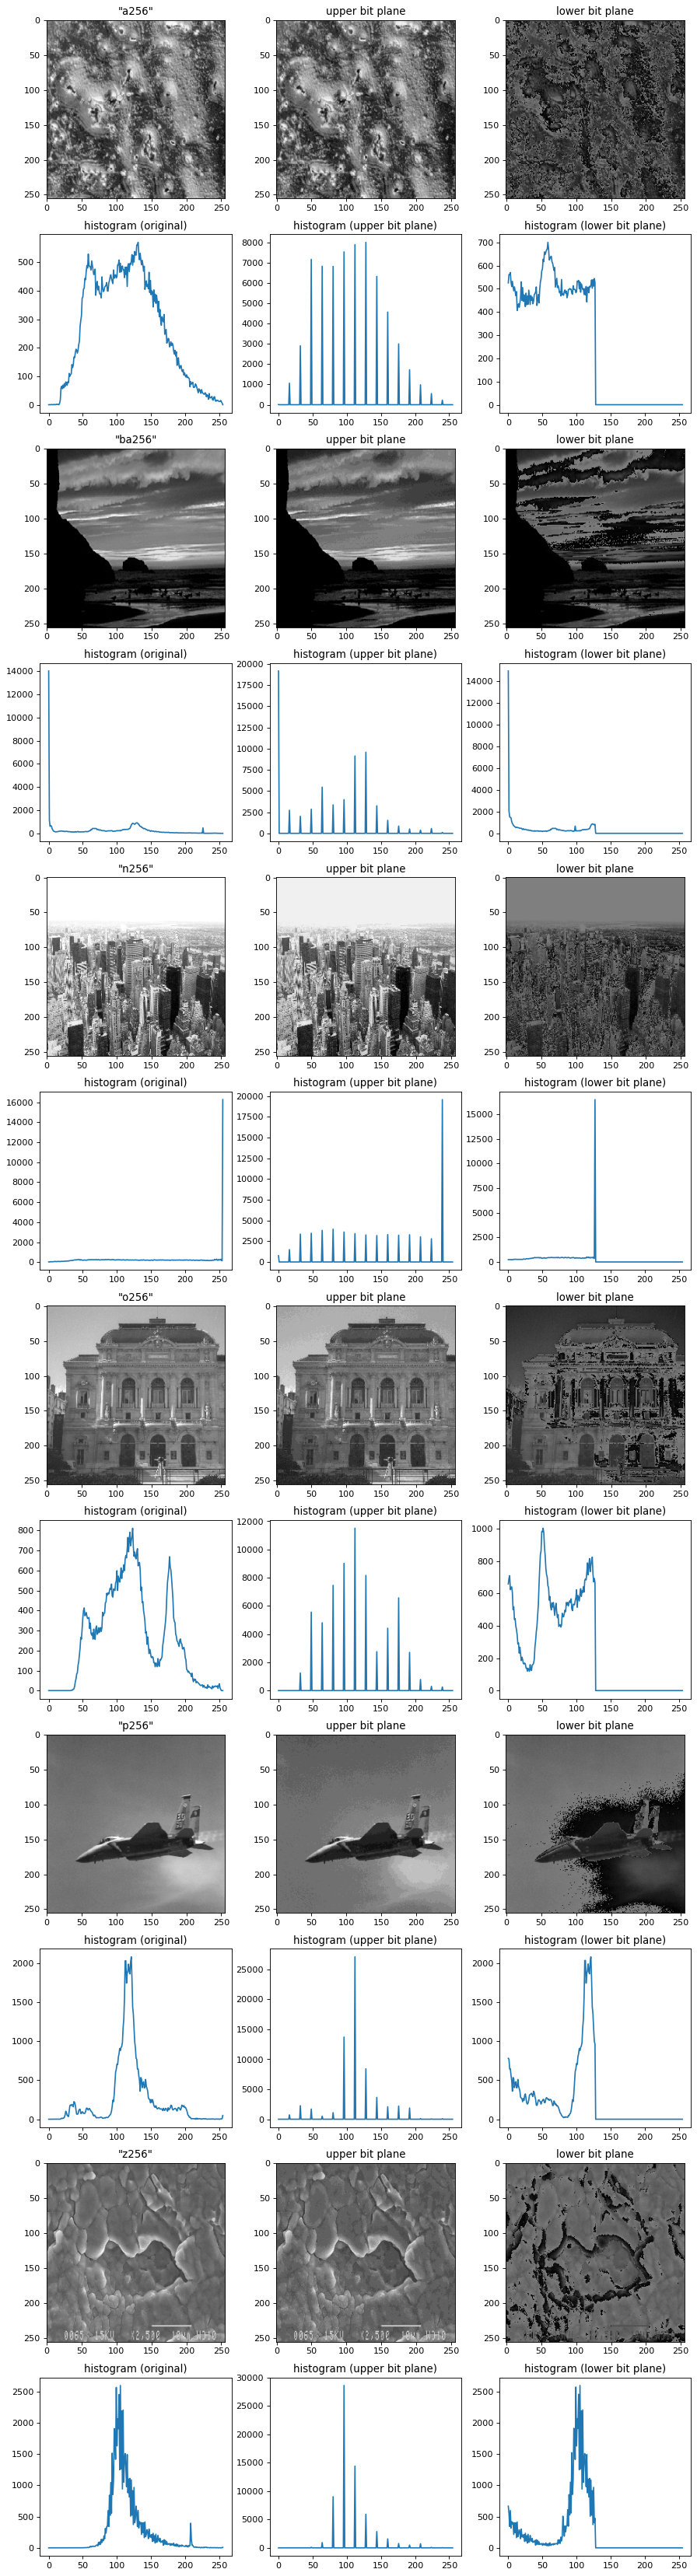

In [7]:
rows, cols = len(images) * 2, 3

# Create figure with rows × cols subplots
fig, axs = plt.subplots(rows, cols, dpi=80)
fig.set_size_inches(4.5 * cols, 4.5 * rows)

# Iterate for all images
for idx, image_dict in enumerate(images):
    filename = image_dict['filename']
    orig = image_dict['orig']
    upper = unset_bit_planes(orig, [0, 1, 2, 3])
    lower = unset_bit_planes(orig, [7])

    hist_orig = gen_histogram(orig)
    hist_upper = gen_histogram(upper)
    hist_lower = gen_histogram(lower)

    axs[2 * idx, 0].set_title('"{}"'.format(filename))
    axs[2 * idx, 0].imshow(orig, cmap='gray', vmin=0, vmax=255)
    
    axs[2 * idx, 1].set_title('upper bit plane'.format(filename))
    axs[2 * idx, 1].imshow(upper, cmap='gray', vmin=0, vmax=255)
    
    axs[2 * idx, 2].set_title('lower bit plane'.format(filename))
    axs[2 * idx, 2].imshow(lower, cmap='gray', vmin=0, vmax=255)
    
    axs[2 * idx + 1, 0].set_title('histogram (original)')
    axs[2 * idx + 1, 0].plot(range(256), hist_orig)

    axs[2 * idx + 1, 1].set_title('histogram (upper bit plane)')
    axs[2 * idx + 1, 1].plot(range(256), hist_upper)

    axs[2 * idx + 1, 2].set_title('histogram (lower bit plane)')
    axs[2 * idx + 1, 2].plot(range(256), hist_lower)

    # Save pixel values of threshold image as a 2D matrix in a .dat file
    np.savetxt(
        path_out_conv + ext_inp[1:] + '/' + filename + '_hist' + ext_inp,
        hist_orig,
        fmt=' %d',
        newline=' \n'
    )

    # Save pixel values of threshold image as a 2D matrix in a .dat file
    np.savetxt(
        path_out_conv + ext_inp[1:] + '/' + filename + '_hist_upper' + ext_inp,
        hist_upper,
        fmt=' %d',
        newline=' \n'
    )

    # Save pixel values of threshold image as a 2D matrix in a .dat file
    np.savetxt(
        path_out_conv + ext_inp[1:] + '/' + filename + '_hist_lower' + ext_inp,
        hist_lower,
        fmt=' %d',
        newline=' \n'
    )

# Save and display the figure
plt.savefig('histogram_comp.jpg')
plt.show()